In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
#importing libraries 
import cv2
import numpy as np
import keras 
import tensorflow as tf
import os
import imghdr
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [12]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
    #to avoid oom errors 
    #by consuming the the growth

In [15]:
#the path of the data directory 
data_dir=r'C:/Users/sarasla/Desktop/diabetic eye'

In [16]:
#Generates a tf.data.Dataset from image files in a directory. (building data pipeline)
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 219 files belonging to 2 classes.


In [17]:
#creating data iterator we can loop through. (access the data pipeline)
data_iterator = data.as_numpy_iterator()

In [18]:
batch = data_iterator.next()

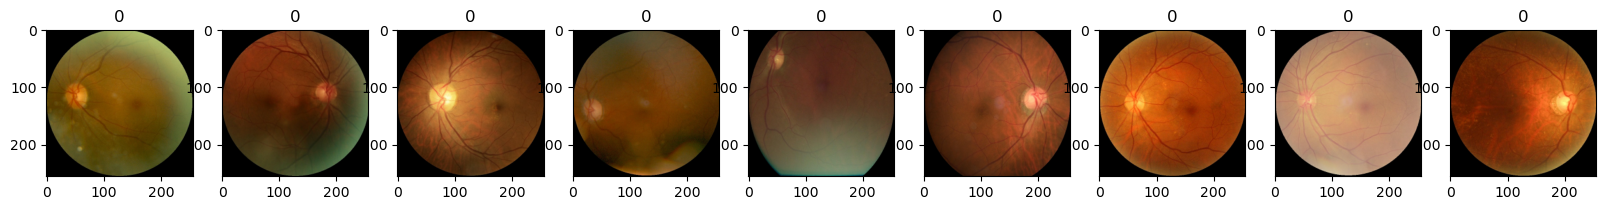

In [19]:
#using matplotlib 
fig, ax = plt.subplots(ncols=9, figsize=(20,20)) #subplots to plot the images
for i, img in enumerate(batch[0][:9]): #takes a collection and returns it as an enumerate object 
    ax[i].imshow(img.astype(int))
    ax[i].title.set_text(batch[1][i])
    #0 normal(-)
    #1 have the disease (+) 

In [20]:
#preprocessing our data
scaled= batch[0] /255
#scaling for 0 to 1

In [21]:
scaled.max()

1.0

In [22]:
data=data.map(lambda x,y: (x/255,y)) 
#map function apply transformation into the pipeline, and lambda to give acces to the transformation 

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [23]:
scaled_iterator=data.as_numpy_iterator()

In [24]:
batch = scaled_iterator.next()

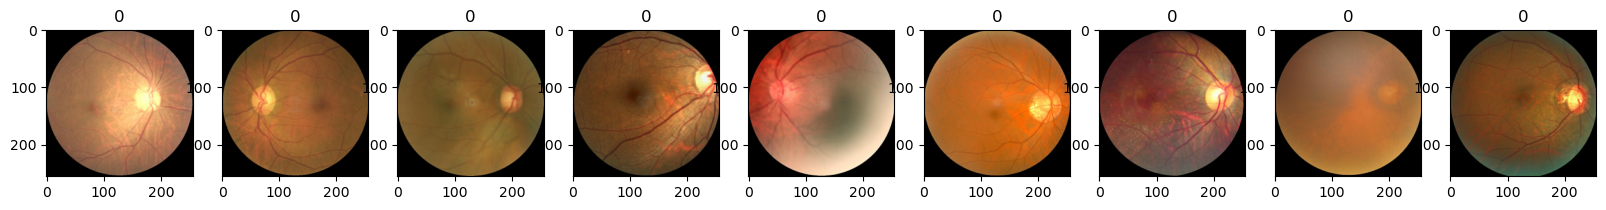

In [25]:
fig, ax = plt.subplots(ncols=9, figsize=(20,20))
for i, img in enumerate(batch[0][:9]):
    ax[i].imshow(img) #since we devide it by 255, it is no longer integer
    ax[i].title.set_text(batch[1][i])



In [26]:
#now spliting our dataset into training and testing parts
len(data) #length of the data

7

In [27]:
train_size = int(len(data)*.7)+1
val_size = int(len(data)*.2)+1
test_size= int(len(data)*.1)

In [28]:
train_size+val_size+test_size 

7

In [29]:
#take and skip method
train = data.take(train_size) #how much data we will take
val = data.skip(train_size).take(val_size) #skip the training data and take the validation data
test = data.skip(train_size+val_size).take(test_size) #skip both of the traning and validation data, amd take the testing data

In [30]:
#deep learning model
model = Sequential()

In [31]:
#using rule activation
#number of filters is 16, size of the filters is 3,3 and the stride is 1
#using rule activation
#number of filters is 16, size of the filters is 3,3 and the stride is 1
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())  #MaxPooling2D is going to take the max value and after the relu activation and return back the value                        
                          

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [32]:
#using adam optimizer 
#the program is about 2 classifactions therefore we define the loss function to be binary cross entropy
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [34]:
logdir='logs' #creating a log directory 

In [35]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir) #creating call backs

In [36]:
hist = model.fit(train, epochs=50, validation_data=val, callbacks=[tensorboard_callback])
#epoch is how long were going to train the model

Epoch 1/50
5/5 [==============================] - 21s 3s/step - loss: 0.4071 - accuracy: 0.7750 - val_loss: 0.4614 - val_accuracy: 0.8983
Epoch 2/50
5/5 [==============================] - 8s 2s/step - loss: 0.2460 - accuracy: 0.9187 - val_loss: 0.1328 - val_accuracy: 0.9661
Epoch 3/50
5/5 [==============================] - 8s 2s/step - loss: 0.2257 - accuracy: 0.8875 - val_loss: 0.1608 - val_accuracy: 0.9153
Epoch 4/50
5/5 [==============================] - 8s 2s/step - loss: 0.1412 - accuracy: 0.9062 - val_loss: 0.0642 - val_accuracy: 0.9661
Epoch 5/50
5/5 [==============================] - 8s 2s/step - loss: 0.1243 - accuracy: 0.9750 - val_loss: 0.0582 - val_accuracy: 1.0000
Epoch 6/50
5/5 [==============================] - 8s 2s/step - loss: 0.0934 - accuracy: 0.9688 - val_loss: 0.0567 - val_accuracy: 0.9831
Epoch 7/50
5/5 [==============================] - 8s 2s/step - loss: 0.0486 - accuracy: 0.9875 - val_loss: 0.0288 - val_accuracy: 0.9831
Epoch 8/50
5/5 [========================

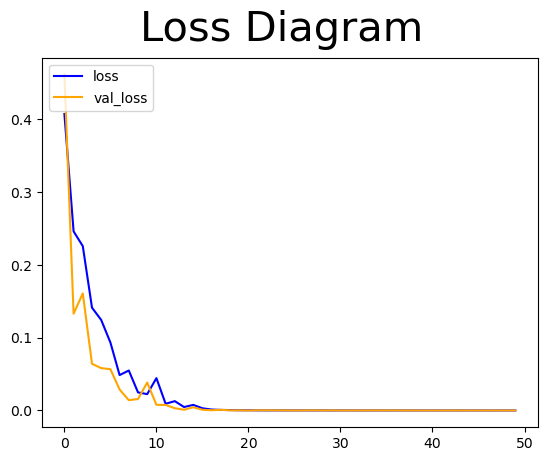

In [37]:
#loss metrics
fig= plt.figure()
plt.plot(hist.history['loss'], color='blue', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss Diagram', fontsize=30)
plt.legend(loc="upper left")
plt.show()

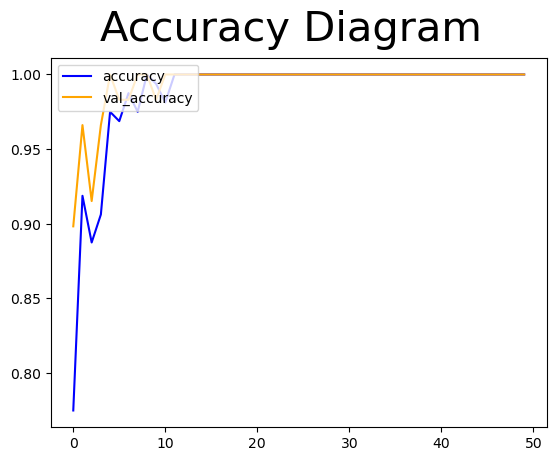

In [38]:
#accuracy metrics
fig= plt.figure()
plt.plot(hist.history['accuracy'], color='blue', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy Diagram', fontsize=30)
plt.legend(loc="upper left")
plt.show()

In [39]:
#evaluation 
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [40]:
pre=Precision()
re= Recall()
acc= BinaryAccuracy()

In [41]:
for batch in test.as_numpy_iterator():
    x,y=batch
    yhat= model.predict(x)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)

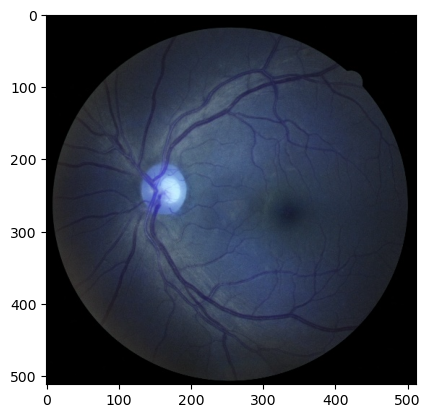

In [47]:
#test
img=cv2.imread(r'C:/Users/sarasla/Desktop/diabetic eye/positive/10109_left.jpeg''')
plt.imshow(img)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


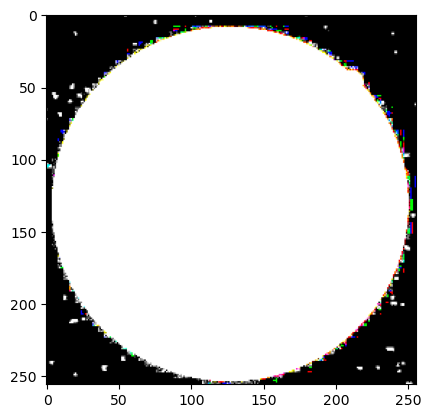

In [48]:
resize= tf.image.resize(img,(256,256))
plt.imshow(cv2.cvtColor(resize.numpy(), cv2.COLOR_BGR2RGB))
plt.show()

In [49]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 1s 550ms/step


In [50]:
if yhat > 0.5:
    print(f'Having a Diabetic eye disease')
else:
    print(f'healthy')

Having a Diabetic eye disease
